# EDA analysis.
## Net load on a weekly resolution. 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

In [71]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': 'white', 'grid.color': '.8'}
)
# NF_ORANGE = '#ff5a36'
# NF_BLUE = '#163251'
# Define the colors based on the google presentation for each season.
COLOR_SUMMER = '#f9da21'
COLOR_WINTER = '#70b2b2'
COLOR_AUTUMN  = '#9e9e9e'
COLOR_SPRING = '#97be6d'
# cmaps_hex = ['#193251','#FF5A36','#696969', '#7589A2','#FF5A36', '#DB6668']
# cmaps_hex = ['#70b2b2', '#f9da21', '#9e9e9e', '#97be6d', '#f9da21', '#70b2b2']
cmaps_hex = [COLOR_SPRING,COLOR_SUMMER,COLOR_AUTUMN,COLOR_WINTER]
sns.set_palette(palette=cmaps_hex)
sns_c = sns.color_palette(palette=cmaps_hex)
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

In [72]:
# Load data for building 5
building_nr = 5
df = pd.read_csv(f"./data/preprocessed/Building_{building_nr}.csv").astype({'datetime': 'datetime64'})#.set_index('datetime')


In [73]:
data_df = df.assign(
    timestamp = lambda x: pd.to_datetime(x['datetime']), 
    date = lambda x: x['timestamp'].dt.date,
    year = lambda x: x['timestamp'].dt.year,
    month = lambda x: x['timestamp'].dt.month,
    day = lambda x: x['timestamp'].dt.day,
    weekofyear = lambda x: x['timestamp'].dt.weekofyear,
    dayofyear = lambda x: x['timestamp'].dt.dayofyear,
    hour = lambda x: x['timestamp'].dt.hour,
)
weekly_data_df = data_df\
    .groupby(['date','year','month','weekofyear','day','dayofyear'], as_index=False)\
    .agg({'net_load_kWh':np.mean})\
    .set_index('date')

/var/folders/8t/vxvv0wfd7q7_yj7gmh717sww0000gn/T/ipykernel_4730/3343951730.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  weekofyear = lambda x: x['timestamp'].dt.weekofyear,


In [74]:
season = list(np.repeat(['Winter','Spring','Summer','Autumn'],3))
season.append(season.pop(0))
# df_season = pd.DataFrame({'season':season, 'month':[month%12 // 3 + 1 for month in range(1, 13)]}, index=range(12))
df_season = pd.DataFrame({'season':season, 'month':range(1,13)}, index=range(12))
data_df = pd.merge(data_df, df_season, how='left', on='month')

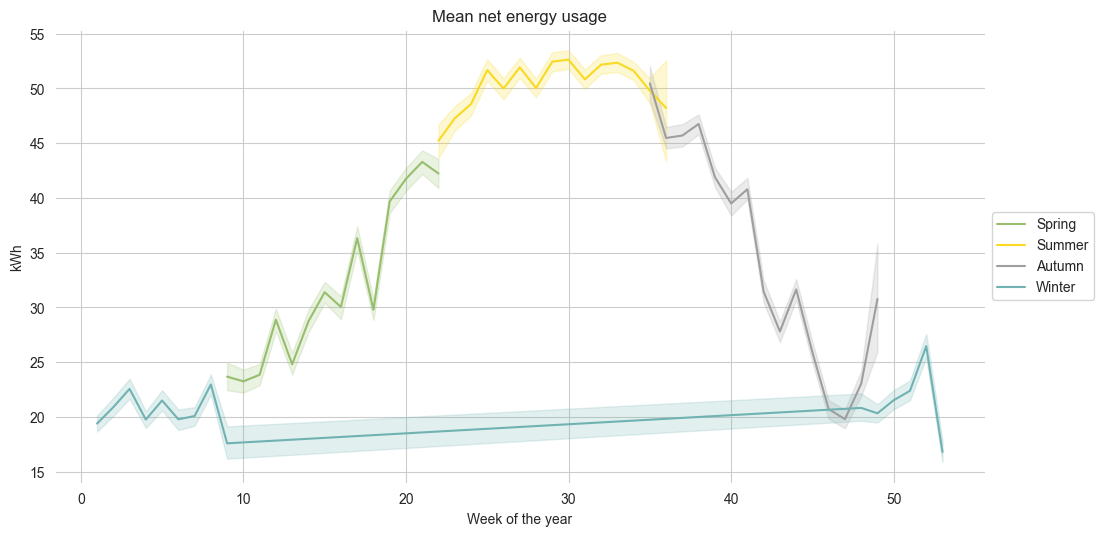

In [98]:
fig, ax = plt.subplots()
#plt.subplot(1, 2, 1)

ax = sns.lineplot(data=data_df, y='net_load_kWh', x='weekofyear',  hue='season', hue_order=['Spring','Summer','Autumn','Winter'])
ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Mean net energy usage', xlabel='Week of the year', ylabel='kWh');
fig.savefig('./images/weekoftheyear_net_energy_usage.png', dpi=450, bbox_inches='tight')


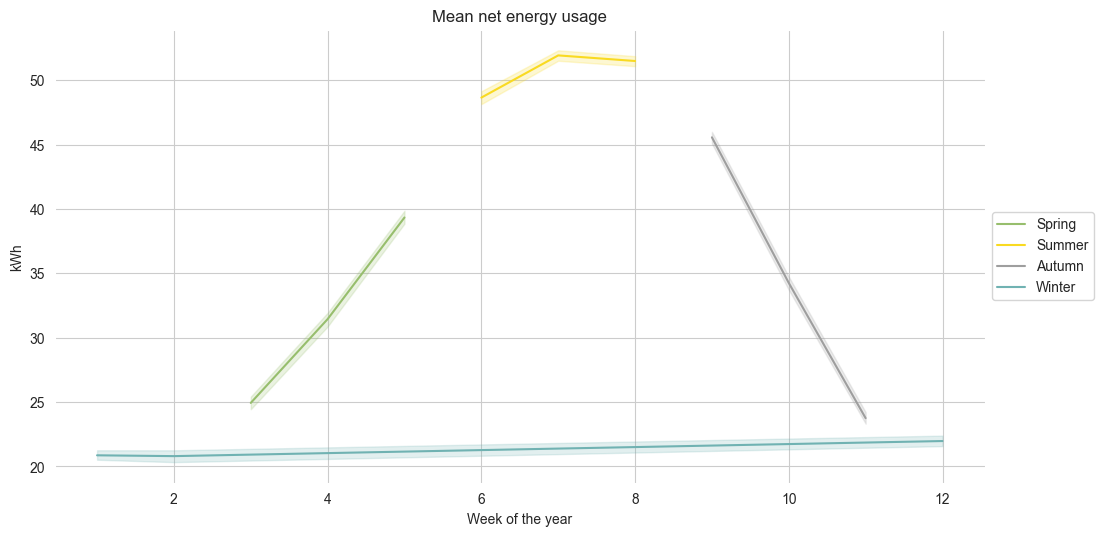

In [97]:
fig, ax = plt.subplots()
#plt.subplot(1, 2, 1)

ax = sns.lineplot(data=data_df, y='net_load_kWh', x='month',  hue='season', hue_order=['Spring','Summer','Autumn','Winter'])
ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Mean net energy usage', xlabel='Month of the year', ylabel='kWh');
fig.savefig('./images/montly_net_energy_usage.png', dpi=450, bbox_inches='tight')
